# California House Prising

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hashlib
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
%matplotlib inline
housing = pd.read_csv('./data_store/housing.csv')

In [7]:
# housing['ocean_proximity'].info()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

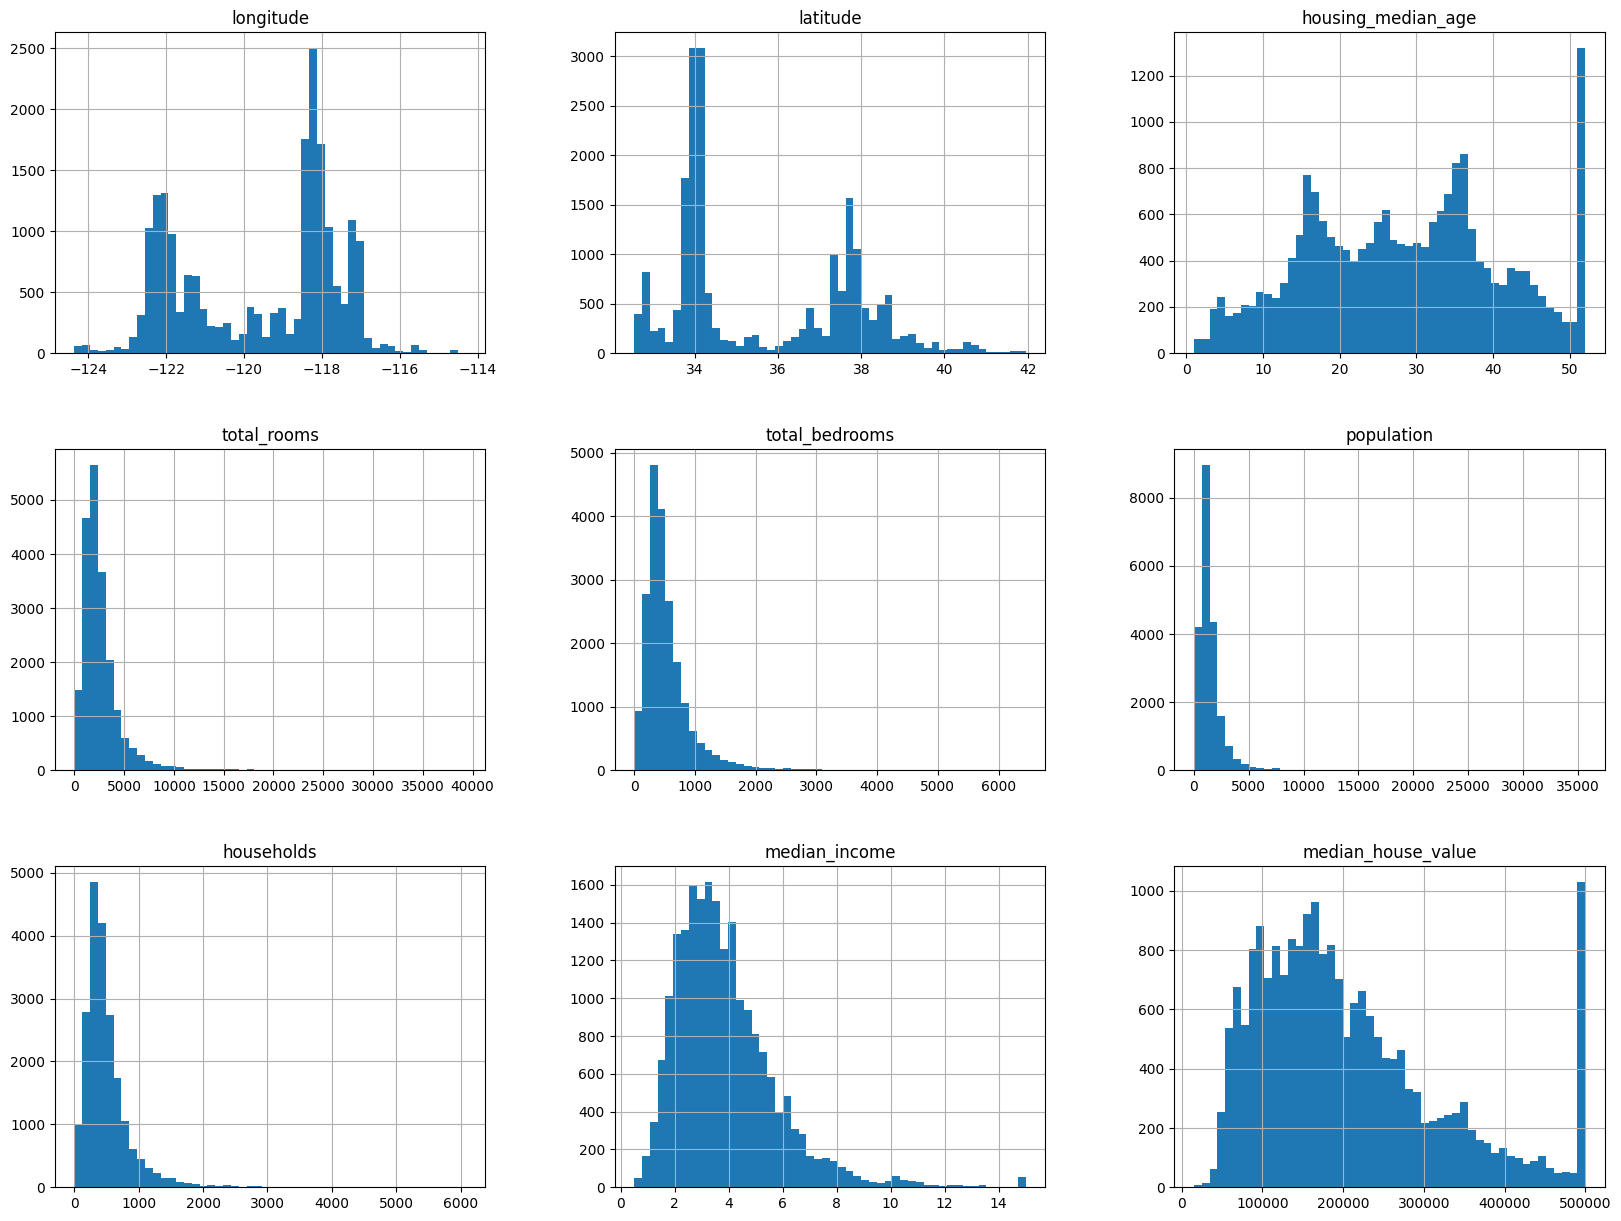

In [8]:
housing.hist(bins=50,figsize=(20,15))

In [9]:
# # test set
# def test_train_split(*,data:pd.core.frame.DataFrame,test_ratio:int|float):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[test_indices],data.iloc[train_indices]

In [10]:
# test_data,train_data = (test_train_split(data=housing,test_ratio=0.2))

#histogram
# housing_with_id.hist(bins=50,figsize=(20,15))

In [11]:
# def test_set_check(identifier,test_ratio,hash):
#     return hash(np.int64(identifier)).digest()[-1] < (256 * test_ratio )
# def test_train_split(data,test_ratio,id_column,hash=hashlib.md5):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_ : test_set_check(id_,test_ratio,hash))
#     return data.loc[~in_test_set],data.loc[in_test_set]

In [12]:
# #this approach uses increasing index column (0,1,2,3,4,5,...) as id. If we go with this we always needs to ensure that new data only appends to the data otherwise this fail to persist train and test data..
# housing_with_id = housing.reset_index()
# train_set,test_set = test_train_split(housing_with_id,0.2,"index")

# #this approach uses latitude and longitude to comute an unique id
# housing_with_id = housing
# housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
# train_set,test_set = test_train_split(housing_with_id,0.2,"id")
# #this approach too is not give absolute uniqueness

# using hashing 
# housing_with_id = housing
# housing_with_id['id'] = housing['longitude'].astype('str')+'_'+housing['latitude'].astype('str')
# housing_with_id['id'] = housing['id'].apply(lambda _id: abs(hash(_id)))
# train_set,test_set = test_train_split(housing_with_id,0.2,"id")

# using sklearn.model_selection import train_test_split
# train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [13]:
categorizer = 3
categorizer = 1.5
housing["income_cat"] = np.ceil(housing["median_income"]/categorizer)
housing["income_cat"] = housing["income_cat"].where(housing["income_cat"]<5,5.0)

<Axes: >

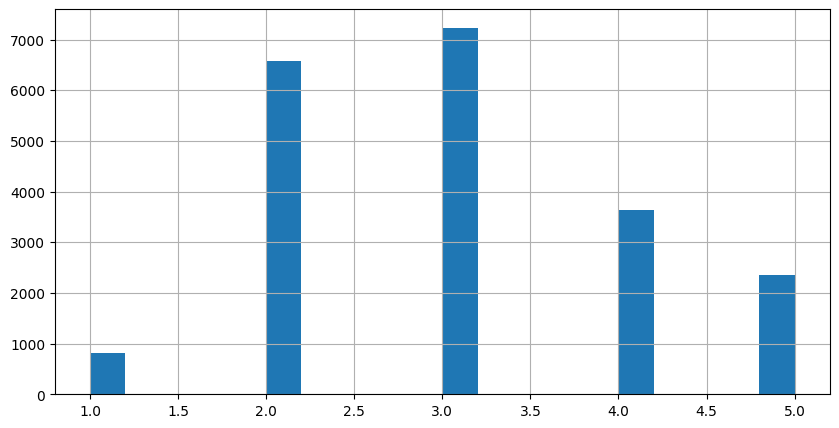

In [14]:
housing["income_cat"].hist(bins=20,figsize=(10,5))

In [15]:
split = StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=42)

In [16]:
for train_indices,test_indices in split.split(housing,housing["income_cat"]):
    print(train_indices,test_indices)
    strat_train_set = housing.loc[train_indices]
    strat_test_set = housing.loc[test_indices]

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]
[13027  9783 19268 ...  7576  5912  3909] [12161  3624 19942 ...  4285 10098   956]
[ 1071 13965 14222 ... 14514  5422 15091] [14614  7777 13406 ... 10989 10743 10584]


In [17]:
#Stratified set income range proportions
strat_train_set["income_cat"].value_counts() / len(strat_train_set)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [18]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat",axis=1,inplace=True,errors='raise')
housing_train_set = strat_train_set.copy()

16512


<Axes: xlabel='longitude', ylabel='latitude'>

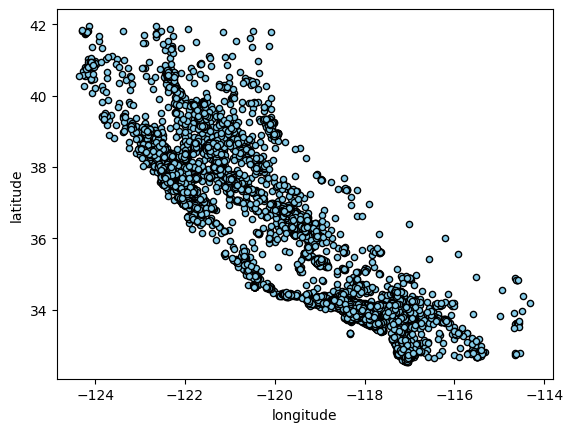

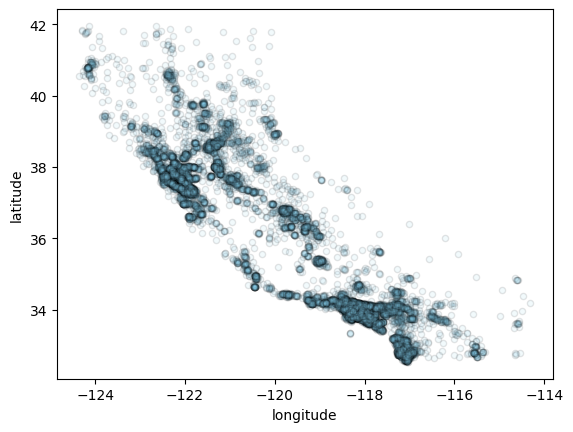

In [19]:
print(len(housing_train_set))
housing_train_set.plot(kind="scatter",x="longitude",y="latitude",color="skyblue",edgecolors='black')
housing_train_set.plot(kind="scatter",x="longitude",y="latitude",color="skyblue",edgecolors='black',alpha=0.1)

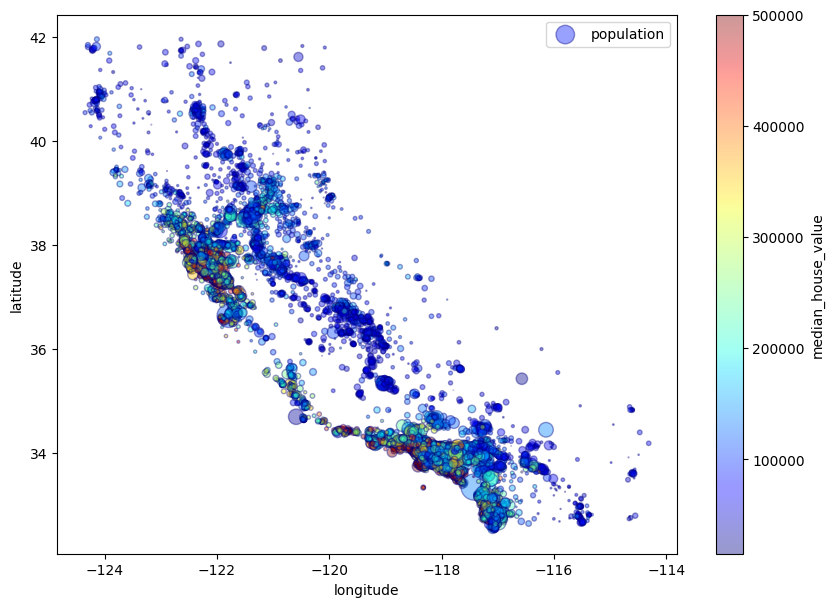

In [20]:
housing_train_set.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    edgecolor="navy",
    alpha=0.4,
    s=housing_train_set["population"]/100,
    label="population",figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
)
plt.legend()

In [21]:
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_value', ylabel='total_rooms'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='media

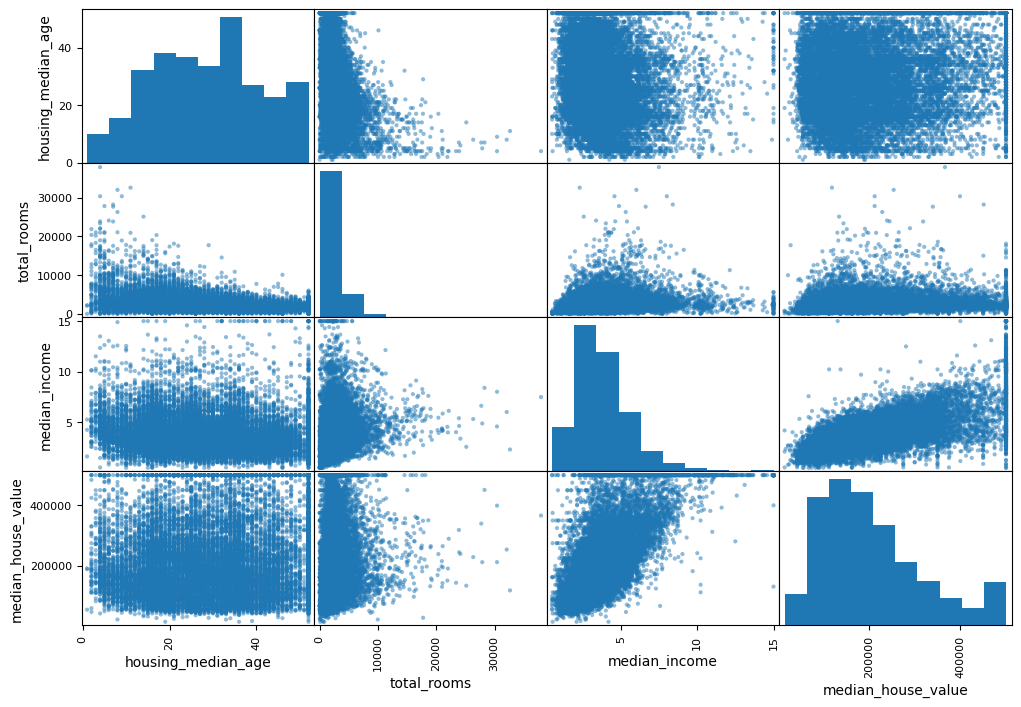

In [22]:
# print(housing_train_set.columns)
attributes = ['housing_median_age', 'total_rooms', 'median_income','median_house_value']
scatter_matrix(housing_train_set[attributes],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

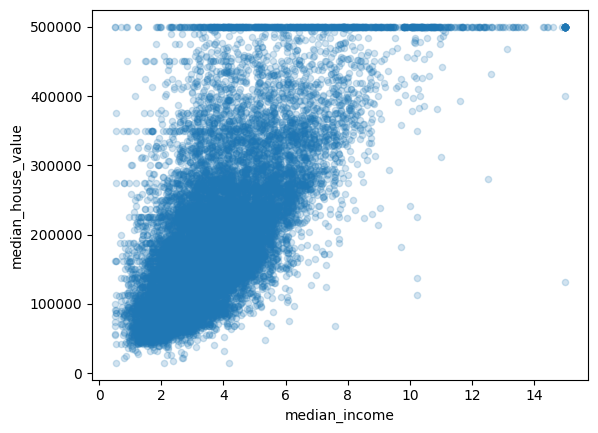

In [23]:
housing_train_set.plot(kind="scatter",x="median_income",y="median_house_value", alpha=0.2)

In [24]:
# we are creating useful features from fetures that seems not useful

housing_train_set["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing_train_set["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing_train_set["population_per_household"] = housing["population"]/housing["households"]

In [25]:
corr_matrix = housing_train_set.select_dtypes(exclude=['object']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687344
rooms_per_household         0.145591
total_rooms                 0.132079
housing_median_age          0.107231
households                  0.065071
total_bedrooms              0.047997
population_per_household   -0.022337
population                 -0.024588
longitude                  -0.051653
latitude                   -0.138560
bedrooms_per_room          -0.253393
Name: median_house_value, dtype: float64

In [26]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_lables = strat_train_set["median_house_value"].copy()

In [27]:
# # drops rows with null values in total_bedrooms column
# housing.dropna(subset=["total_bedrooms"])

# # drops the column total_bedrooms as a whole
# housing.drop(["total_bedrooms"],axis=1)

# # filling emptys with median in total_bedrooms column
# bedrooms_median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(bedrooms_median)


In [28]:
# we can't always assure that only total_bedrooms column can have a missing values 
# so we can use sklearn's imputing concept to fill out dataframe 
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity",axis=1)

imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [29]:
print(imputer.statistics_)
print(housing_num.median().values)
print(type(imputer.statistics_ == housing_num.median().values))

[-118.48      34.25      29.      2123.       433.      1163.
  409.         3.53175]
[-118.48      34.25      29.      2123.       433.      1163.
  409.         3.53175]
<class 'numpy.ndarray'>


In [30]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [31]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

1071         INLAND
13965        INLAND
14222    NEAR OCEAN
15468     <1H OCEAN
11245     <1H OCEAN
14797    NEAR OCEAN
18172     <1H OCEAN
4206      <1H OCEAN
7015      <1H OCEAN
234        NEAR BAY
Name: ocean_proximity, dtype: object

In [32]:
housing_cat_encoded,housing_categories = housing_cat.factorize()
print(housing_cat_encoded[:10])
print(housing_categories)

[0 0 1 2 2 1 2 2 2 3]
Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')


In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], shape=(16512, 5))

In [34]:
# import sys,os
# sys.path.append(os.getcwd())
from housing_transformers.CombinedAttributesAdder import CombinedAttributesAdder
from housing_transformers.DataFrameSelector import DataFrameSelector
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [35]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [36]:
# num_pipeline = Pipeline([
#     ('imputer',SimpleImputer(strategy='median')),
#     ('attribs_adder',CombinedAttributesAdder()),
#     ('std_scaler',StandardScaler()),
# ])

# housing_num_tr = num_pipeline.fit_transform(housing_num)

In [37]:
num_attributes = list(housing_num)
cat_attributes = ["ocean_proximity"]

In [38]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [39]:
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
    ('cat_encoder',OneHotEncoder(sparse_output=False))
])

In [40]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline),
])
housing_prepared = full_pipeline.fit_transform(housing)

# Model training

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_lables)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
some_data  = housing.iloc[:5]
some_labeles = housing_lables.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions : ",lin_reg.predict(some_data_prepared))
print("labels : ",list(some_labeles))

predictions :  [102857.81563847 276280.34566767 242109.95487042 202551.32879268
 242826.76937624]
labels :  [85100.0, 147800.0, 303900.0, 209700.0, 177100.0]


In [44]:
from sklearn.metrics import mean_squared_error
# linear regression mean squared error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_lables,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68063.00779639748)

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_lables)
tree_reg #underfiting

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [46]:
#decission tree regressor mse
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_lables,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse #overfiting

np.float64(0.0)

In [47]:
from sklearn.model_selection import cross_val_score
from housing_helper import display_scores

In [48]:
# DecisionTreeRegressor cross validation scores
scores = cross_val_score(tree_reg,housing_prepared,housing_lables,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores :  [69814.1654137  70959.04404489 71650.0301197  67917.95706932
 70607.66299729 71178.39924188 69726.25230669 69353.09883509
 70228.26883516 71703.72108949]
Mean :  70313.85999532018
Standard deviation :  1106.0195020062401


In [49]:
# Linear Regression model cross validation scores
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_lables,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores :  [71434.65179439 67924.09433603 68992.31671403 66075.00269389
 65424.86056094 68711.29534168 71961.67753427 65924.20049037
 67534.98381049 69651.45483466]
Mean :  68363.45381107433
Standard deviation :  2127.3592736301553


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_lables)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
# random forest mse (too heavy to fit toook more than 30s to fit |:(| )
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_lables,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18612.212804779236)

In [53]:
# random forest cross validation 
# commenting because took ~4min to execute too expensive for my system
# forest_scores = cross_val_score(forest_reg,housing_prepared,housing_lables,scoring="neg_mean_squared_error",cv=10)
# forest_rmse_scores = np.sqrt(-forest_scores)
# display_scores(forest_rmse_scores)

# Fine tuning 

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared,housing_lables)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,30


In [55]:
grid_search.best_estimator_

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64236.48086874283 {'max_features': 2, 'n_estimators': 3}
55379.98664814709 {'max_features': 2, 'n_estimators': 10}
52496.485228025726 {'max_features': 2, 'n_estimators': 30}
59523.279023944146 {'max_features': 4, 'n_estimators': 3}
52268.70460889032 {'max_features': 4, 'n_estimators': 10}
50056.106322682004 {'max_features': 4, 'n_estimators': 30}
58417.23290313763 {'max_features': 6, 'n_estimators': 3}
51333.27460674917 {'max_features': 6, 'n_estimators': 10}
50227.169252104344 {'max_features': 6, 'n_estimators': 30}
58328.52779357251 {'max_features': 8, 'n_estimators': 3}
51609.4568844117 {'max_features': 8, 'n_estimators': 10}
49807.686805849786 {'max_features': 8, 'n_estimators': 30}
62447.19550637084 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53631.04365966671 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59412.8032681576 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51949.6583538862 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
# print(len(feature_importances),feature_importances)
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attributes = list(cat_encoder.categories_[0])
attributes = num_attributes+extra_attribs+cat_one_hot_attributes
# print(len(attributes),attributes)

In [58]:
sorted(zip(feature_importances,attributes),reverse=True)

[(np.float64(0.3689894710445683), 'median_income'),
 (np.float64(0.16064461740061), 'INLAND'),
 (np.float64(0.1134678012725451), 'pop_per_hhold'),
 (np.float64(0.06708031567810617), 'longitude'),
 (np.float64(0.06488852195403852), 'bedrooms_per_room'),
 (np.float64(0.06238635867255085), 'latitude'),
 (np.float64(0.049083074046758365), 'rooms_per_hhold'),
 (np.float64(0.04154034808464607), 'housing_median_age'),
 (np.float64(0.014987137087073955), 'population'),
 (np.float64(0.014983163765542602), 'total_rooms'),
 (np.float64(0.01408256594754211), 'total_bedrooms'),
 (np.float64(0.013782540400413401), 'households'),
 (np.float64(0.00897715679164533), '<1H OCEAN'),
 (np.float64(0.003234958213907251), 'NEAR OCEAN'),
 (np.float64(0.0015527770705745826), 'NEAR BAY'),
 (np.float64(0.000319192569477322), 'ISLAND')]

# Evaluation (finally!)

In [59]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

print("Final Root Mean Suqared Error : ",final_rmse)

Final Root Mean Suqared Error :  49769.176515858904


# Am I just got pranked ??

# saving the Model

In [60]:
import joblib,os
if not os.path.exists('model_outcomes'):
    os.makedirs('model_outcomes')

joblib.dump(final_model,"model_outcomes/housing_predictor_model.pkl")

# to use this import like
# housing_predictor_model = joblib.load("model_outcomes/housing_predictor_model.pkl")

['model_outcomes/housing_predictor_model.pkl']

# END